In [1]:
%load_ext autoreload
%autoreload 2

import torch
from pytorch3d.io import load_objs_as_meshes
from pytorch3d.structures import Meshes
from pytorch3d.renderer import CamerasBase

from text3d2video.ipython_utils import display_ims
from text3d2video.rendering import render_depth_map

In [2]:
device = torch.device("cuda")
meshes = load_objs_as_meshes(["data/meshes/mixamo-human.obj"], device=device)


def mesh_views(mesh: Meshes, cameras: CamerasBase, resolution=100):
    frames = meshes.extend(len(cameras))
    depth_maps = render_depth_map(frames, cameras, resolution=resolution)
    display_ims(depth_maps)

[-30.         -23.33333333 -16.66666667 -10.          -3.33333333
   3.33333333  10.          16.66666667  23.33333333  30.        ]


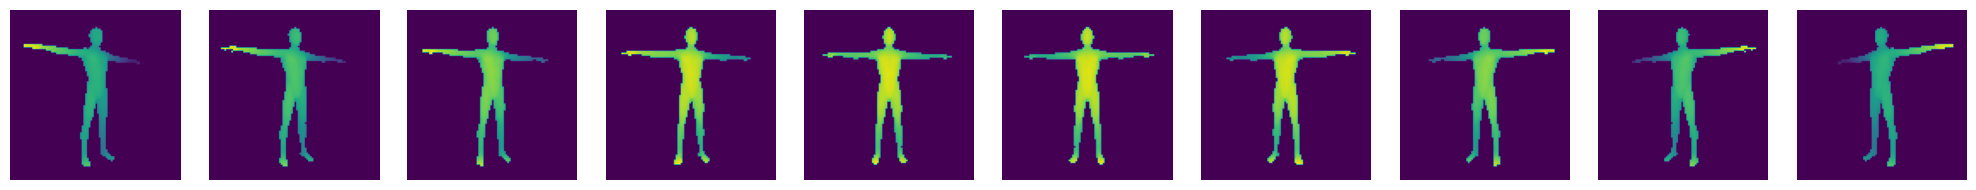

In [5]:
from text3d2video.camera_placement import turntable_cams

cameras = turntable_cams(10, dist=2, start_angle=-30, stop_angle=30, device=device)

mesh_views(meshes, cameras)

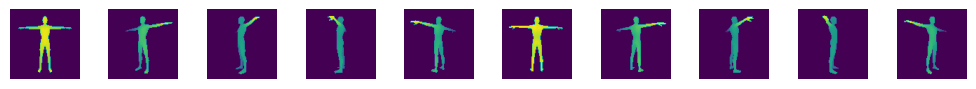

In [35]:
from text3d2video.camera_placement import turntable_loop_cameras

cameras = turntable_loop_cameras(10, dist=2, device=device)

mesh_views(meshes, cameras)

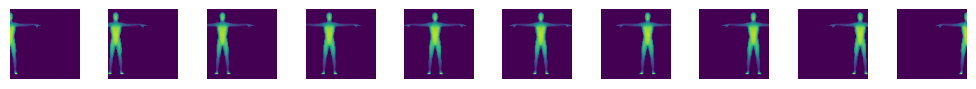

In [ ]:
from text3d2video.camera_placement import sideways_orthographic_cameras

cameras = sideways_orthographic_cameras(1, -1, 10)
mesh_views(meshes, cameras)

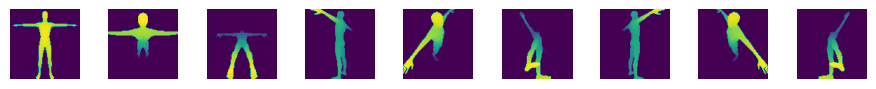

In [9]:
from text3d2video.camera_placement import multiview_cameras


cameras = multiview_cameras(meshes, 10, device=device)
mesh_views(meshes, cameras)

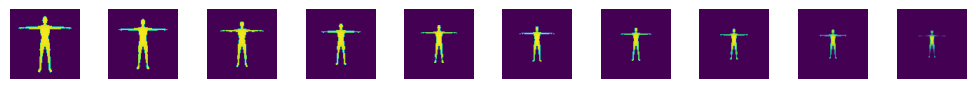

In [3]:
from text3d2video.camera_placement import z_movement_cameras

cameras = z_movement_cameras(device=device)
mesh_views(meshes, cameras)

[  0.  90. 180. 270.]


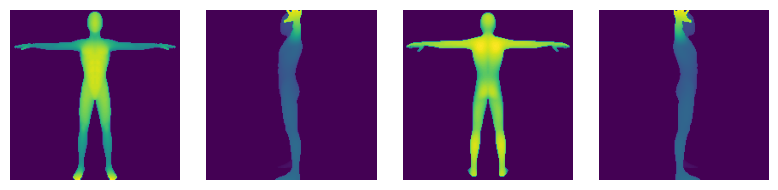

In [42]:
from text3d2video.camera_placement import turntable_cams

N = 4
cameras = turntable_cams(N, 2, endpoint=False, fov=50)
mesh_views(meshes, cameras, resolution=200)

[  0.  36.  72. 108. 144. 180. 216. 252. 288. 324.]


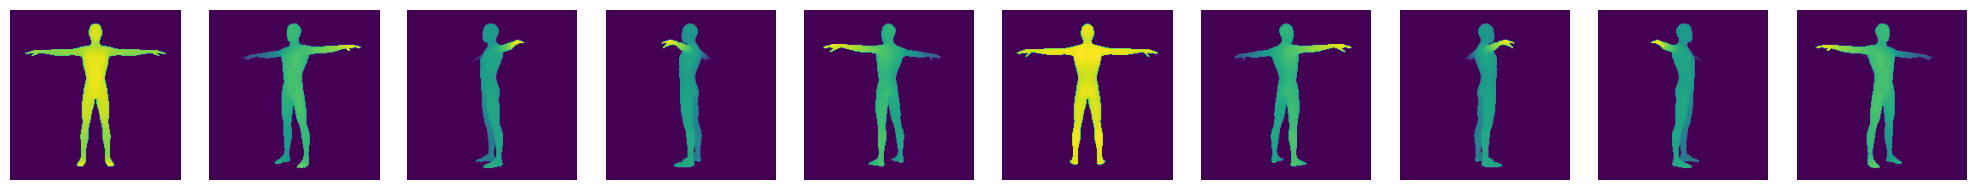

In [47]:
N = 10
cameras = turntable_cams(N, 4, endpoint=False, fov=30)
mesh_views(meshes, cameras, resolution=200)

1.0000000000000002


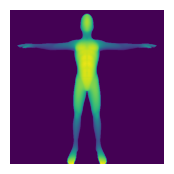

<Figure size 640x480 with 0 Axes>

In [93]:
import math
from pytorch3d.renderer import FoVPerspectiveCameras, look_at_view_transform

fov = 90
azim = 0
elev = 0
dist = 1 / math.tan(math.radians(fov) / 2)
R, T = look_at_view_transform(dist, azim, elev)
cam = FoVPerspectiveCameras(fov=fov, device=device, R=R, T=T)

print(dist)

ims = render_depth_map(meshes, cam)
display_ims(ims)